# **Image Processing with Python — Blurring and Sharpening for Beginners**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d

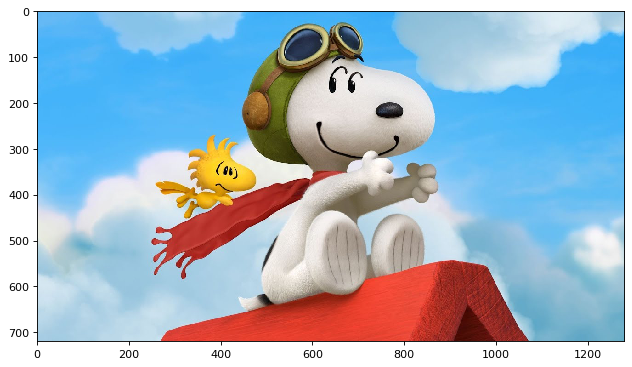

In [ ]:
dog = imread('dog.jpg')
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(dog);

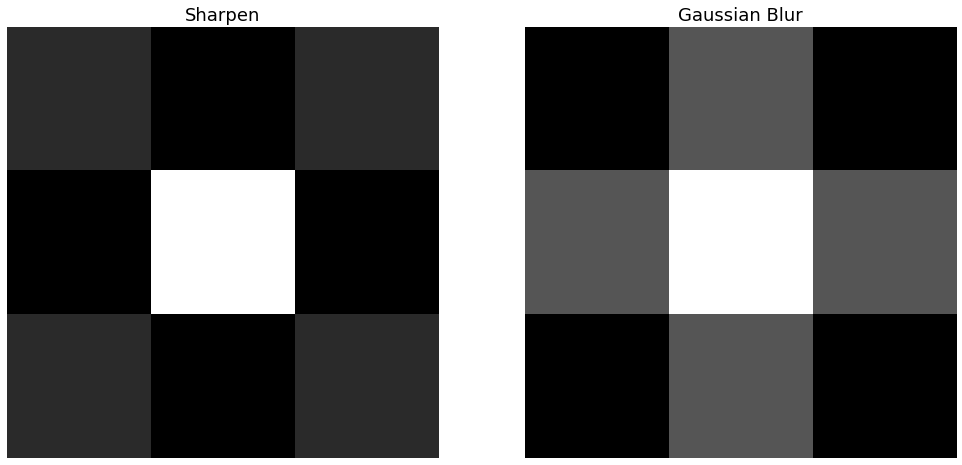

In [ ]:
# Sharpen
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# Gaussian Blur
gaussian = (1 / 16.0) * np.array([[1., 2., 1.],
                                  [2., 4., 2.],
                                  [1., 2., 1.]])
fig, ax = plt.subplots(1,2, figsize = (17,10))
ax[0].imshow(sharpen, cmap='gray')
ax[0].set_title(f'Sharpen', fontsize = 18)
    
ax[1].imshow(gaussian, cmap='gray')
ax[1].set_title(f'Gaussian Blur', fontsize = 18)
    
[axi.set_axis_off() for axi in ax.ravel()];

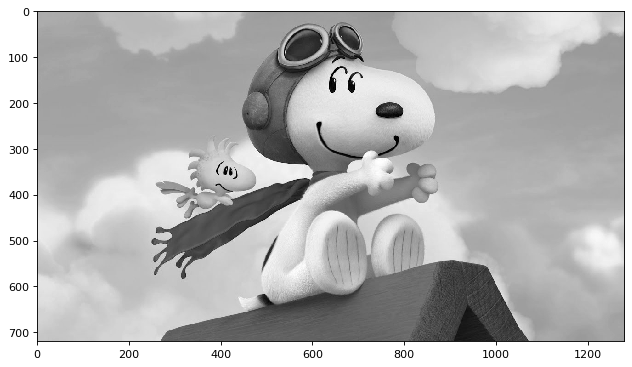

In [ ]:
dog_grey = rgb2gray(dog)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(dog_grey);

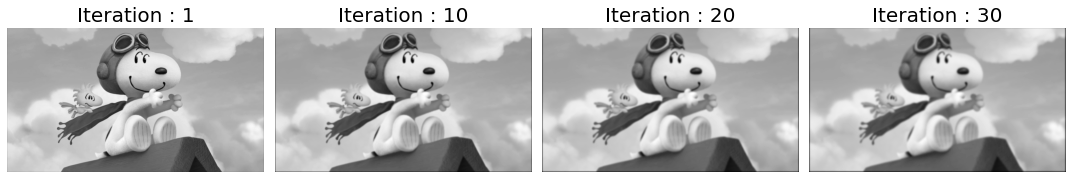

In [ ]:
def convolution_plotter(image, kernel):
    iterations = [1,10,20,30]
    f_size = 20
    
    fig, ax = plt.subplots(1,4, figsize = (15,7))
    for n, ax in enumerate(ax.flatten()):
        ax.set_title(f'Iteration : {iterations[n]}', fontsize = f_size)
        ax.imshow(multi_convolver(image, kernel, iterations[n]), cmap='gray')
        ax.set_axis_off()
    fig.tight_layout()
    
convolution_plotter(dog_grey, gaussian)

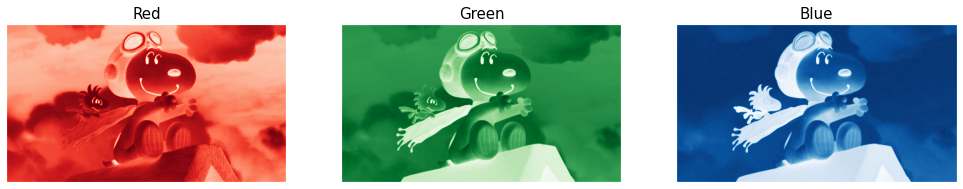

In [ ]:
def convolver_rgb(image, kernel, iterations = 1):
    convolved_image_r = multi_convolver(image[:,:,0], kernel, iterations)
    convolved_image_g = multi_convolver(image[:,:,1], kernel, iterations)
    convolved_image_b  = multi_convolver(image[:,:,2], kernel, iterations)
    
    reformed_image = np.dstack((np.rint(abs(convolved_image_r)), 
                                np.rint(abs(convolved_image_g)), 
                                np.rint(abs(convolved_image_b)))) / 255
   
   
    fig, ax = plt.subplots(1,3, figsize = (17,10))
    
    ax[0].imshow(abs(convolved_image_r), cmap='Reds')
    ax[0].set_title(f'Red', fontsize = 15)
    
    ax[1].imshow(abs(convolved_image_g), cmap='Greens')
    ax[1].set_title(f'Green', fontsize = 15)
    
    ax[2].imshow(abs(convolved_image_b), cmap='Blues')
    ax[2].set_title(f'Blue', fontsize = 15)
    
    [axi.set_axis_off() for axi in ax.ravel()]
    
    return np.array(reformed_image).astype(np.uint8)

convolved_rgb_gauss = convolver_rgb(dog, gaussian, 2)

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


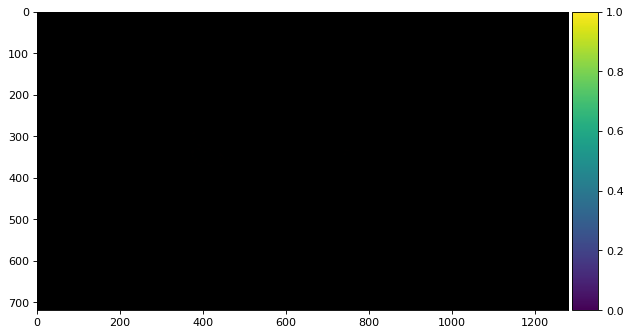

In [ ]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(convolved_rgb_gauss);

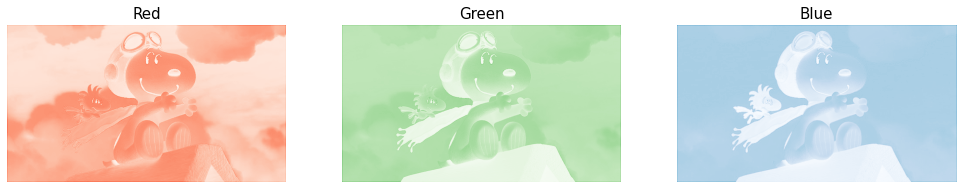

In [ ]:
convolved_rgb_sharpen = convolver_rgb(dog, sharpen, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


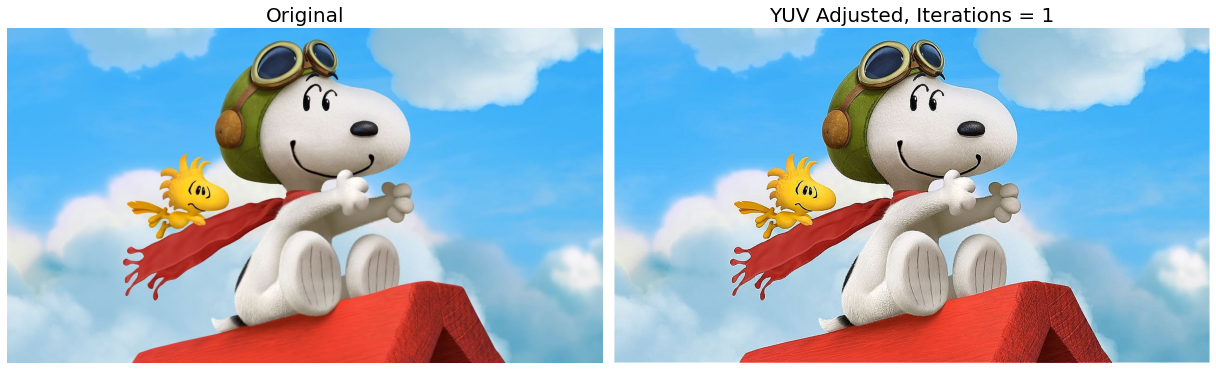

In [ ]:
def convolver_rgb(image, kernel, iterations = 1):
    img_yuv = rgb2yuv(image)   
    img_yuv[:,:,0] = multi_convolver(img_yuv[:,:,0], kernel, iterations)
    final_image = yuv2rgb(img_yuv)
                               
    fig, ax = plt.subplots(1,2, figsize = (17,10))
    
    ax[0].imshow(image)
    ax[0].set_title(f'Original', fontsize = 20)
    
    ax[1].imshow(final_image);
    ax[1].set_title(f'YUV Adjusted, Iterations = {iterations}', fontsize = 20)
    
    [axi.set_axis_off() for axi in ax.ravel()]
    
    fig.tight_layout()
    
    return final_image

final_image = convolver_rgb(dog, sharpen, iterations = 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


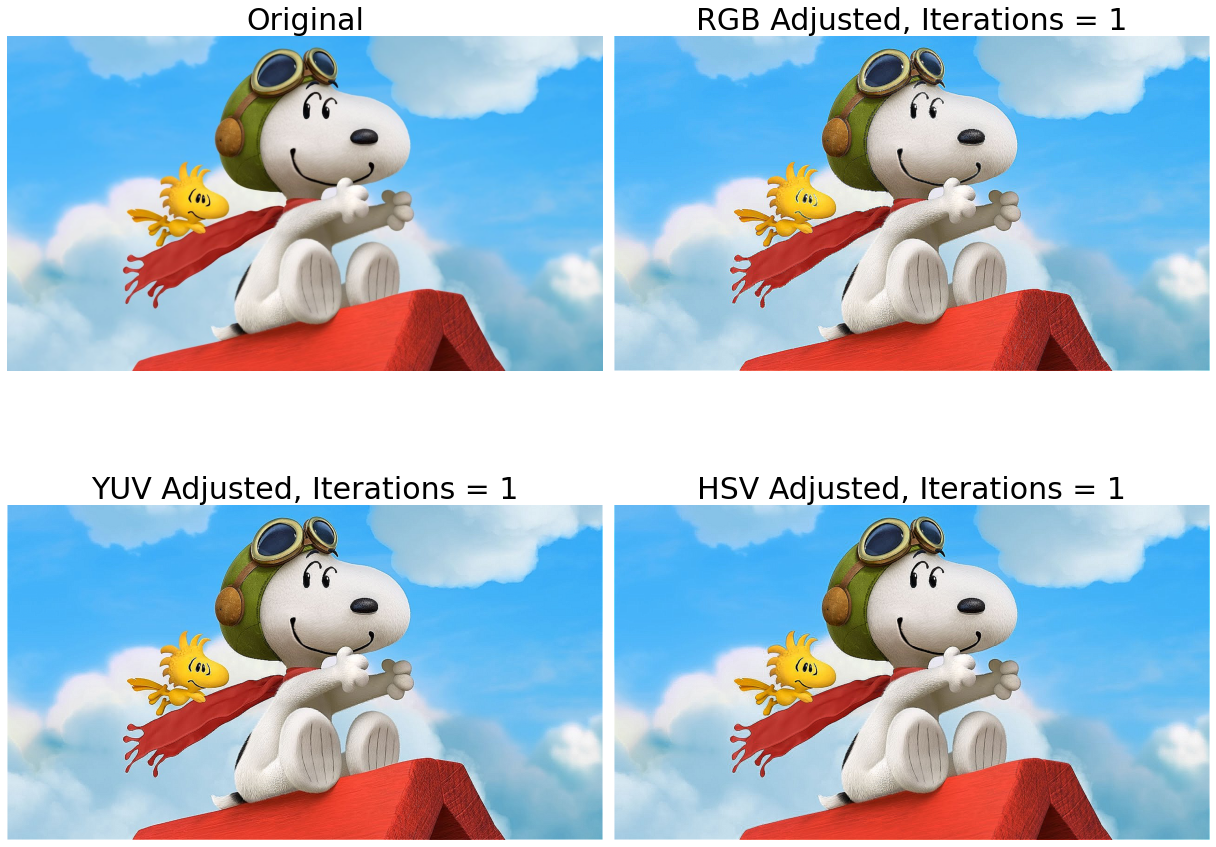

In [ ]:
def convolver_comparison(image, kernel, iterations = 1):
    img_yuv = rgb2yuv(image)   
    img_yuv[:,:,0] = multi_convolver(img_yuv[:,:,0], kernel, iterations)
    final_image_yuv = yuv2rgb(img_yuv)
    
    img_hsv = rgb2hsv(image)   
    img_hsv[:,:,2] = multi_convolver(img_hsv[:,:,2], kernel, iterations)
    final_image_hsv = hsv2rgb(img_hsv)
    

    convolved_image_r = multi_convolver(image[:,:,0], kernel, iterations)
    convolved_image_g = multi_convolver(image[:,:,1], kernel, iterations)
    convolved_image_b  = multi_convolver(image[:,:,2], kernel, iterations)
    
    final_image_rgb = np.dstack((np.rint(abs(convolved_image_r)), 
                                 np.rint(abs(convolved_image_g)), 
                                 np.rint(abs(convolved_image_b)))) / 255
                               
    fig, ax = plt.subplots(2,2, figsize = (17,17))
    
    ax[0][0].imshow(image)
    ax[0][0].set_title(f'Original', fontsize = 30)
    
    ax[0][1].imshow(final_image_rgb);
    ax[0][1].set_title(f'RGB Adjusted, Iterations = {iterations}', fontsize = 30)
    fig.tight_layout()
    
    ax[1][0].imshow(final_image_yuv)
    ax[1][0].set_title(f'YUV Adjusted, Iterations = {iterations}', fontsize = 30)
    
    ax[1][1].imshow(final_image_hsv)
    ax[1][1].set_title(f'HSV Adjusted, Iterations = {iterations}', fontsize = 30)
    
    [axi.set_axis_off() for axi in ax.ravel()]
    
    fig.tight_layout()

convolver_comparison(dog, sharpen, iterations = 1)